# Load Feature Maps

In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Satellite data

### GEBCO

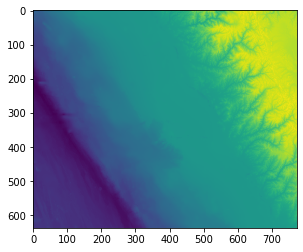

In [2]:
## BATHY
f = netCDF4.Dataset('/home/amdroy/MEGA/DATA/OCEAN/GEBCO/gebco_2019_pescadores.nc')
elevation = np.array(f.variables['elevation'])
lon,lat = np.array(f.variables['lon']), np.array(f.variables['lat'])

lat = np.flip(lat)
bathy = np.array(np.flipud(elevation))
data = bathy

plt.imshow(data)
plt.show()


# save Map -------------------------
with open('./feature/bathy', 'wb') as f:
    pickle.dump(data,f)
    pickle.dump(lon,f)
    pickle.dump(lat,f)
# ----------------------------------------------

### MODIS

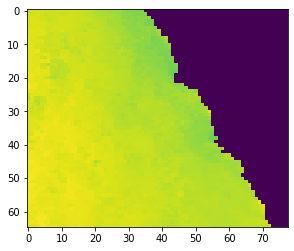

In [3]:
## TEMPERATURE
f = netCDF4.Dataset('/home/amdroy/MEGA/DATA/OCEAN/MODIS/MODIS_AQUA_L3_SST_THERMAL_DAILY_4KM_DAYTIME_V2014_P1108.nc')
TEMP,lon,lat = np.array(f.variables['sst']), np.array(f.variables['lon']), np.array(f.variables['lat'])

data = np.zeros((TEMP.shape[1], TEMP.shape[2]))
for i in range(TEMP.shape[1]):
    for j in range(TEMP.shape[2]):
        temp = [TEMP[k,i,j] for k in range(TEMP.shape[0]) if TEMP[k,i,j]>=0]
        if not len(temp) == 0:
            data[i,j] = np.mean(temp)

plt.imshow(data)
plt.show()

# save Map -------------------------
with open('./feature/temperature', 'wb') as f:
    pickle.dump(data,f)
    pickle.dump(lon,f)
    pickle.dump(lat,f)
# ----------------------------------------------

### GlobColour

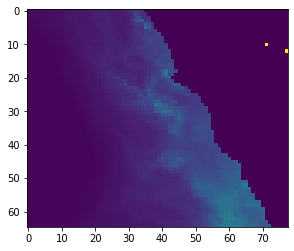

In [4]:
## CHLOROPHYLL-A
f = netCDF4.Dataset('/home/amdroy/MEGA/DATA/OCEAN/GlobColour/dataset-oc-glo-bio-multi-l4-chl_interpolated_4km_daily-rep_P1108.nc')
CHL,lon,lat = np.array(f.variables['CHL']), np.array(f.variables['lon']), np.array(f.variables['lat'])

data = np.zeros(CHL[0,:,:].shape)
for i in range(CHL.shape[0]):
    data += CHL[i,:,:]
data = data/CHL.shape[0]
data[data<0] = 0

plt.imshow(data)
plt.show()

# save Map -------------------------
with open('./feature/chlorophyll', 'wb') as f:
    pickle.dump(data,f)
    pickle.dump(lon,f)
    pickle.dump(lat,f)
# ----------------------------------------------

### ASCAT

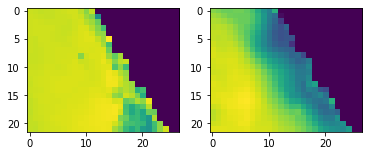

In [5]:
# WIND
f = netCDF4.Dataset('/home/amdroy/MEGA/DATA/OCEAN/ASCAT/KNMI-GLO-WIND_L3-REP-OBS_METOP-A_ASCAT_12_ASC_P1108.nc')

wind_to_dir, wind_speed = f.variables['wind_to_dir'], f.variables['wind_speed'], 
lon,lat =  np.array(f.variables['lon']), np.array(f.variables['lat'])

wind_d = np.zeros((wind_to_dir.shape[1], wind_to_dir.shape[2]))
wind_s = np.zeros((wind_speed.shape[1], wind_speed.shape[2]))
for i in range(wind_to_dir.shape[1]):
    for j in range(wind_to_dir.shape[2]):
        d = [wind_to_dir[k,i,j] for k in range(wind_to_dir.shape[0]) if wind_to_dir[k,i,j]>=0]
        s = [wind_speed[k,i,j] for k in range(wind_speed.shape[0]) if wind_speed[k,i,j]>=0]
        if not len(d) == 0:
            wind_d[i,j] = np.mean(d)
        if not len(s) == 0:
            wind_s[i,j] = np.mean(s)
            
data_dir = np.flipud(wind_d)
data_speed = np.flipud(wind_s)

fig, axs = plt.subplots(1,2)
axs[0].imshow(data_dir)
axs[1].imshow(data_speed)
plt.show()

lon = lon - 360
lat = np.flip(lat)

# save Map -------------------------
with open('./feature/wind_dir', 'wb') as f:
    pickle.dump(data_dir,f)
    pickle.dump(lon,f)
    pickle.dump(lat,f)
    
with open('./feature/wind_speed', 'wb') as f:
    pickle.dump(data_speed,f)
    pickle.dump(lon,f)
    pickle.dump(lat,f)
# ----------------------------------------------

## Acoustic data

In [8]:
import pandas as pd
import sqlite3

request = "SELECT lon, lat, nasc FROM fish WHERE place = 'Pescadores' AND date > '2008-10-01' AND date < '2009-01-01'"
conn = sqlite3.connect('/home/amdroy/MEGA/DATA/seabirdbank.db')

df = pd.read_sql_query(request, conn)

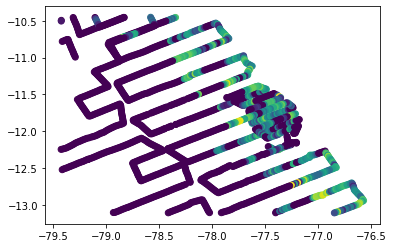

In [9]:
fish = df.values

plt.scatter(fish[:,0], fish[:,1], c=np.log(fish[:,2]+1))